In [2]:
!pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 751.6 kB/s eta 0:00:00a 0:00:01


In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go

In [26]:
df = pd.read_csv('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep=';'
                , low_memory=False)
df['Timestamp'] = pd.to_datetime(df['Date']+' '+df['Time'])
df = df.drop(['Date', 'Time'], axis=1)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Timestamp
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.430,4.000,0.000,0.000,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.000,4.000,0.000,0.000,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.820,3.800,0.000,0.000,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.700,3.800,0.000,0.000,0.0,2010-11-26 21:01:00


In [28]:
df.Sub_metering_2.value_counts()
df.loc[df.Global_active_power == "?"]
df = df.set_index('Timestamp').asfreq('1d')
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Timestamp,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-17 17:24:00,3.390,0.170,232.650,14.600,0.000,0.000,17.0
2006-12-18 17:24:00,1.956,0.000,239.570,8.000,0.000,0.000,18.0
2006-12-19 17:24:00,1.446,0.000,240.510,6.000,0.000,0.000,17.0
2006-12-20 17:24:00,0.430,0.126,244.480,1.800,0.000,0.000,0.0
...,...,...,...,...,...,...,...
2010-12-07 17:24:00,1.498,0.328,240.300,6.400,0.000,1.000,18.0
2010-12-08 17:24:00,0.404,0.354,242.730,2.200,0.000,2.000,1.0
2010-12-09 17:24:00,0.982,0.432,240.710,4.400,0.000,1.000,12.0


In [29]:
print(df.isnull().any())
df.dropna(inplace=True)
df = df.reset_index(drop=True)
print(df.isnull().any())
df

Global_active_power      True
Global_reactive_power    True
Voltage                  True
Global_intensity         True
Sub_metering_1           True
Sub_metering_2           True
Sub_metering_3           True
dtype: bool
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,3.390,0.170,232.650,14.600,0.000,0.000,17.0
2,1.956,0.000,239.570,8.000,0.000,0.000,18.0
3,1.446,0.000,240.510,6.000,0.000,0.000,17.0
4,0.430,0.126,244.480,1.800,0.000,0.000,0.0
...,...,...,...,...,...,...,...
1418,1.498,0.328,240.300,6.400,0.000,1.000,18.0
1419,0.404,0.354,242.730,2.200,0.000,2.000,1.0
1420,0.982,0.432,240.710,4.400,0.000,1.000,12.0
1421,0.370,0.074,242.790,1.600,0.000,0.000,1.0


In [30]:
train = df

clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12),
                    random_state=42, verbose=1)
clf.fit(train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.12, random_state=42, verbose=1)

In [31]:
pred = clf.predict(train)
train['anomaly'] = pred
train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,anomaly
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,-1
1,3.390,0.170,232.650,14.600,0.000,0.000,17.0,-1
2,1.956,0.000,239.570,8.000,0.000,0.000,18.0,1
3,1.446,0.000,240.510,6.000,0.000,0.000,17.0,1
4,0.430,0.126,244.480,1.800,0.000,0.000,0.0,1
...,...,...,...,...,...,...,...,...
1418,1.498,0.328,240.300,6.400,0.000,1.000,18.0,1
1419,0.404,0.354,242.730,2.200,0.000,2.000,1.0,1
1420,0.982,0.432,240.710,4.400,0.000,1.000,12.0,-1
1421,0.370,0.074,242.790,1.600,0.000,0.000,1.0,1


In [32]:
train.anomaly.value_counts()

 1    1252
-1     171
Name: anomaly, dtype: int64

In [33]:
outliers = train.loc[train.anomaly == -1]
outliers_index = list(outliers.index)

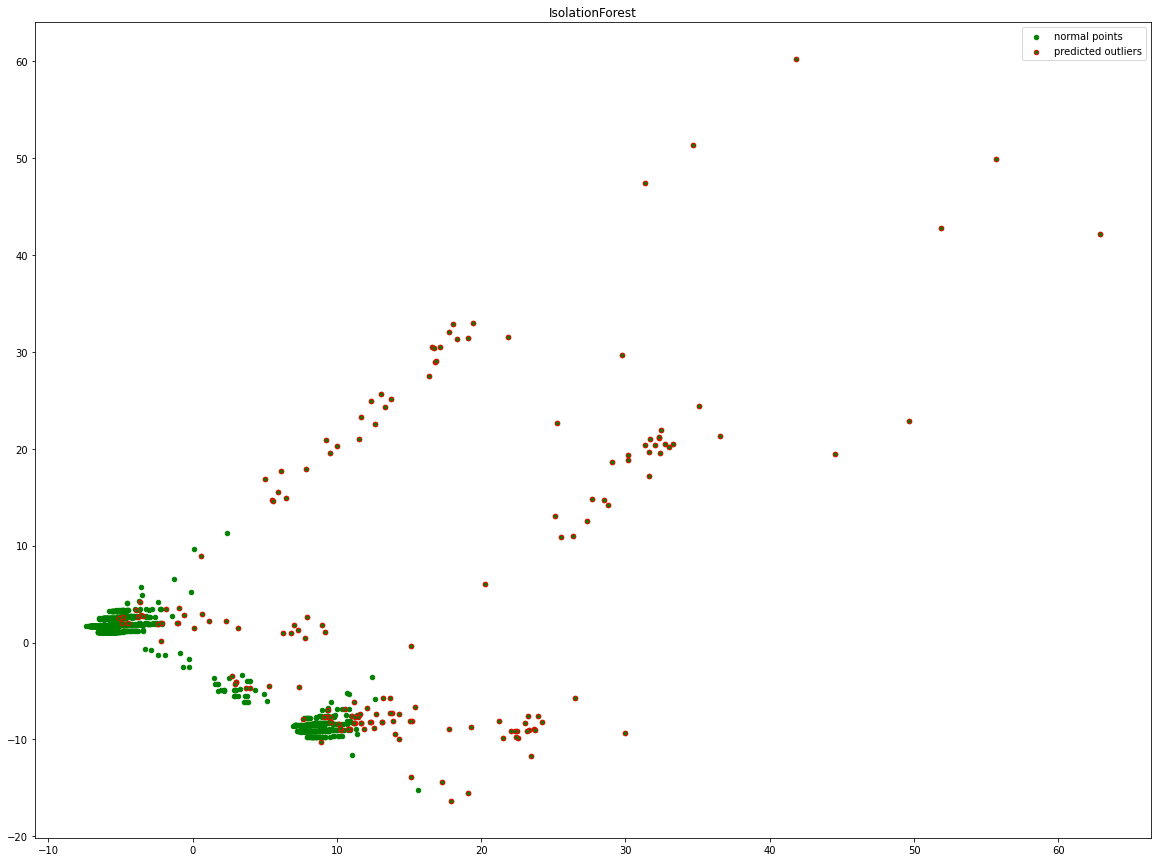

In [34]:
pca = PCA(2)
pca.fit(train)
res=pd.DataFrame(pca.transform(train))

z = np.array(res)

plt.figure(figsize=(20, 15))
plt.title("IsolationForest")
#plt.contourf( z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',s=20,label="normal points")
b1 =plt.scatter(res.iloc[outliers_index,0],res.iloc[outliers_index,1],
                c="green", s=20, edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

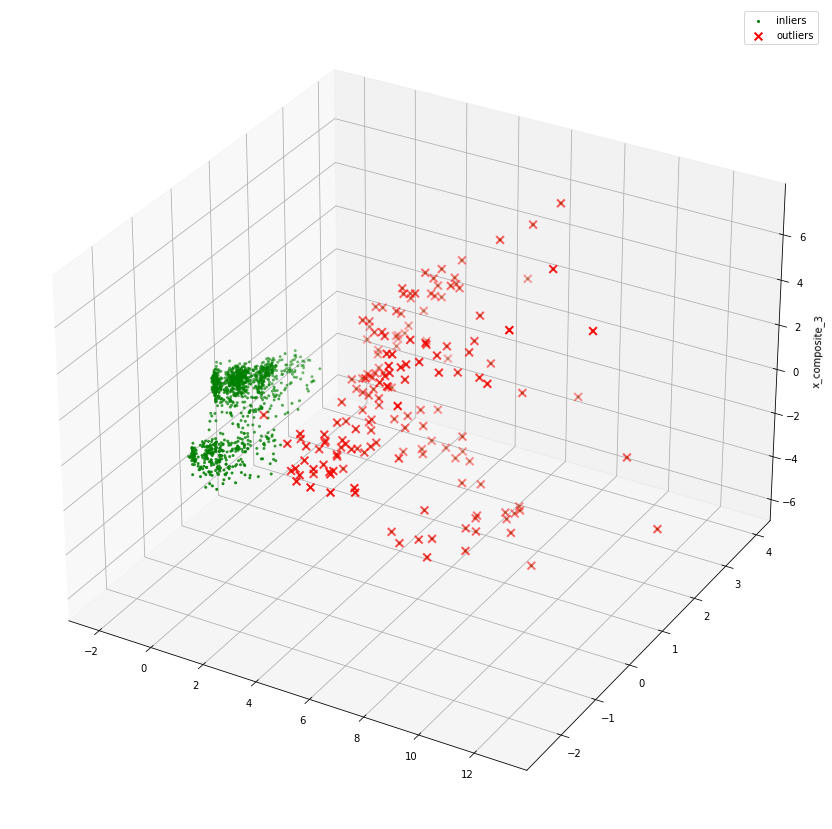

In [35]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(train)
X_reduce = pca.fit_transform(X)
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outliers_index,0],X_reduce[outliers_index,1], X_reduce[outliers_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()